In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy import integrate
import scipy as sp
import seaborn as sns
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

##### [과제] 평균 100, 표준편차 10인 정규분포에서 하측확률이 0.3일 경우의 퍼센트포인트를 구하고 그 ppf를 적용하여 하측확률을 구하세요.  
---

In [5]:
print(stats.norm(100, 10).ppf(0.3))
print(stats.norm(100, 10).cdf(94.75599487291959))

94.75599487291959
0.2999999999999998


##### [과제] 상기 정규분포의 확률밀도함수와 누적분포함수를 시각화하여 하측확률과 pp간 관게를 확인하세요.
---

Text(0, 0.5, '퍼센트포인트')

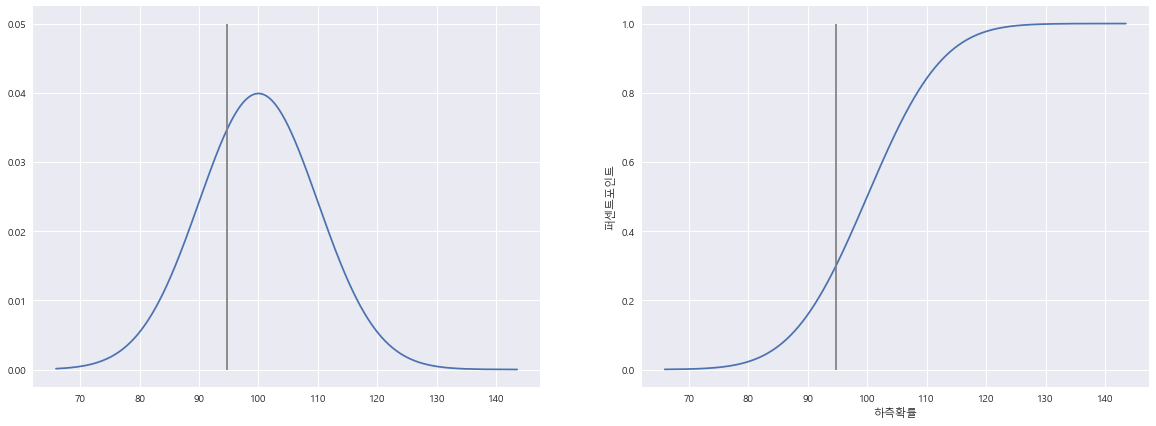

In [6]:
sample = stats.norm(100, 10).rvs(10000)
sample.sort()

fig = plt.figure(figsize = (20, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(sample, stats.norm(100, 10).pdf(sample))
ax1.vlines(94.75599487291959, 0, 0.05, color = 'gray')
ax2.plot(sample, stats.norm(100, 10).cdf(sample))
ax2.vlines(94.75599487291959, 0, 1, color = 'gray')
ax2.set_xlabel('하측확률')
ax2.set_ylabel('퍼센트포인트')

In [7]:
a = float(input('누적 확률이 M이되는 확률변수 값에 직선을 그려드리겠습니다. M을 입력하세요.(0~1사이)'))
rv = stats.norm(loc = 100,scale = 10)
xx = np.linspace(60,141)
pdf = rv.pdf(xx)
cdf = rv.cdf(xx)

fig = plt.figure(figsize=(30,6))
ax1 = fig.add_subplot(121)
ax1.set_ylabel('확률밀도함수',rotation=0,fontsize=12,loc='top')
ax1.set_xlabel('확률변수 값',fontsize=15)
ax1.vlines(rv.ppf(a),0,0.05,colors='gray',ls = ':')
lns1 = ax1.plot(xx,pdf,label='pdf',color='cornflowerblue')

ax2 = plt.twinx(ax1)
lns2 = ax2.set_ylabel('누적분포함수',rotation=0,fontsize=12,loc='bottom')
lns2 = ax2.plot(xx,cdf,label='cdf',color='crimson')
lns = lns1 + lns2
lab = [i.get_label() for i in lns]
ax1.legend(lns,lab,loc='upper left',fontsize=15)

plt.title('확률밀도함수와 누적분포함수',fontsize=30)
plt.show()

누적 확률이 M이되는 확률변수 값에 직선을 그려드리겠습니다. M을 입력하세요.(0~1사이)


ValueError: could not convert string to float: ''

##### [과제] N(mean, sigma**2) 파라미터를 각각 (0,1), (0,4), (1,1)로 변경할 때의 정규분포를 비교할 수 있도록 시각화 하세요 
---

In [ ]:
# 정규분포 사용자 정의 함수
 
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / (np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(-((x-mu)**2) / (2 * sigma ** 2)) # 확률밀도 함수
    return x_range, f

def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 1000)
    
    fig = plt.figure(figsize = (15, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.plot(xs, [f(x) for x in xs], color = 'red')
    ax2.plot(xs, [F(x) for x in xs], color = 'crimson')
    ax1.legend(['확률밀도함수'], fontsize = 15)
    ax2.legend(['누적밀도함수'], fontsize = 15)
    
a = N(0, 1)
b = N(0, 4)
c = N(1, 1)

plot_prob(a, -5, 5)
plot_prob(b, -5, 5)
plot_prob(c, -5, 6)

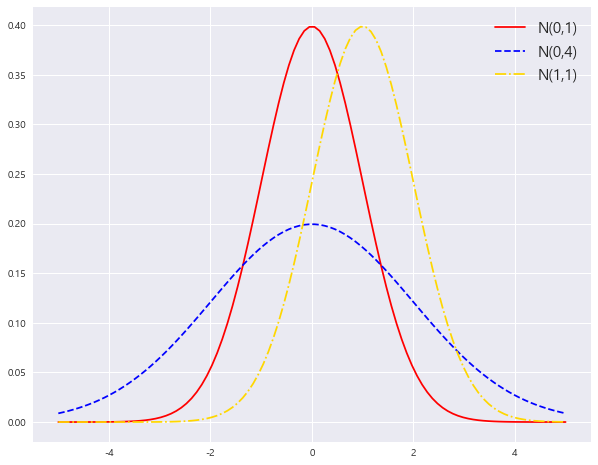

In [9]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

xs = np.linspace(-5,5,100)
params = [(0,1),(0,2),(1,1)]
colors = ['red','blue','gold']
linestyles = ['-', '--', '-.']

for param, ls , color in zip(params,linestyles,colors):
    mu, sigma = param
    rv = stats.norm(mu,sigma)
    ax.plot(xs,rv.pdf(xs), label = f'N({mu},{sigma**2})',ls=ls,color=color)
    
ax.legend(fontsize = 15)
plt.show()

##### [과제] 파라미터 람다가 1, 2, 3으로 변경시 지수분포의 확률분포함수를 시각화 하세요.
---

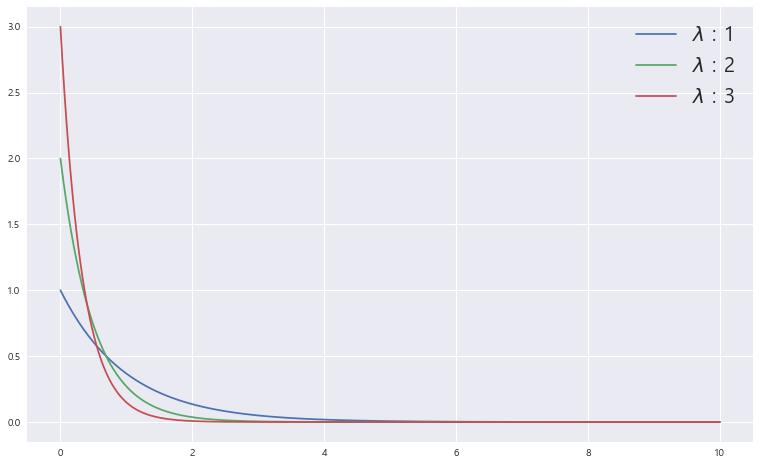

In [34]:
x = np.linspace(0, 10, 1000)

fig = plt.figure(figsize = (13, 8))
ax = fig.add_subplot(111)

for i in range(1, 4):
    lam = i * np.exp(-i * x)
    ax.plot(x, lam)
    ax.legend(['$\lambda$ : 1', '$\lambda$ : 2', '$\lambda$ : 3'], fontsize = 20)

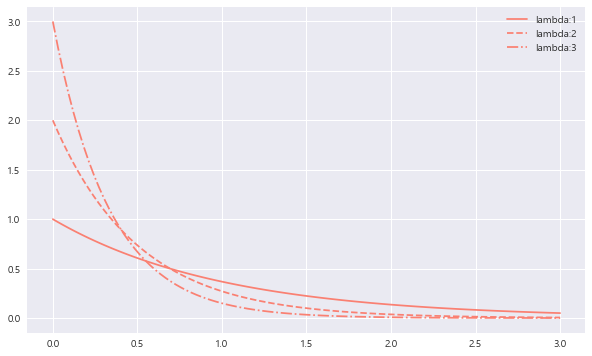

In [32]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,3,100)
for lam,ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale =1/lam)
    ax.plot(xs, rv.pdf(xs), label=f'lambda:{lam}' , ls=ls, color="salmon")
ax.legend()
plt.show()

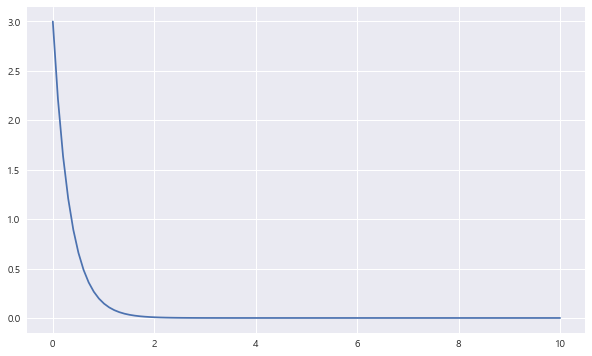

0.950212931632136

In [67]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0,10,100)
ax.plot(xs, stats.expon(0, 1/3).pdf(xs))
plt.show()
stats.expon(0, 1/3).cdf(1)